In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Statistic
import statsmodels.api as sm
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Load the data
data_df = pd.read_csv("USA_cars_datasets.csv")
data_df.drop('Unnamed: 0', axis=1, inplace=True)
data_df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Top 4 brands by frequency

In [3]:
freq_df = pd.DataFrame({"Counts":data_df['brand'].value_counts().head(4)})
freq_df

,Counts
ford,1235
dodge,432
nissan,312
chevrolet,297


In [4]:
top4_brand_df = data_df[data_df['brand'].isin(freq_df.index)]
top4_brand_df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


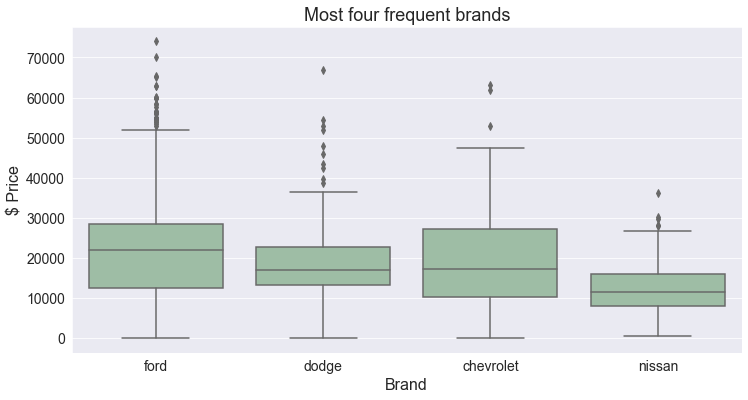

In [5]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='brand', y='price', data=top4_brand_df, color='#99c2a2')
# ax = sns.swarmplot(x="brand", y="price", data=top4_brand_df, color='#7d0013')
plt.xlabel('Brand', fontsize = 16)
plt.ylabel('$ Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Most four frequent brands', fontsize = 18)
plt.show()

### Q-Q plot: Determine if each group is normally distributed.
A <strong>Q-Q plot</strong>, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.

If the data is normally distributed, the points in a Q-Q plot will lie on a straight diagonal line.

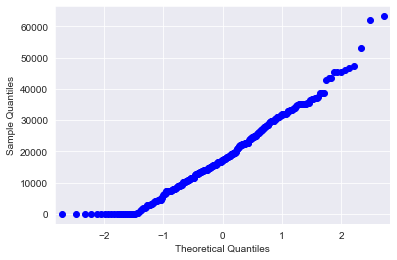

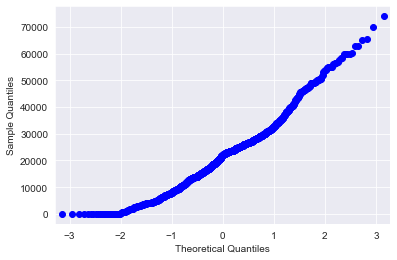

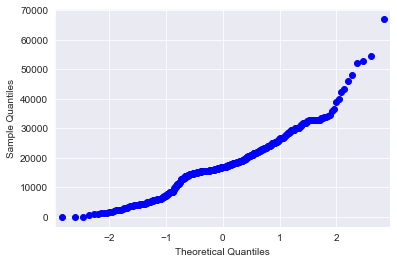

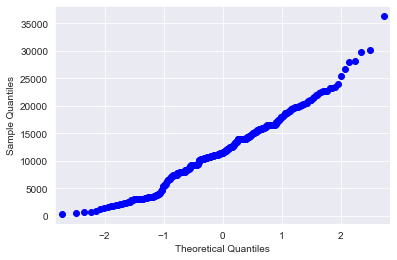

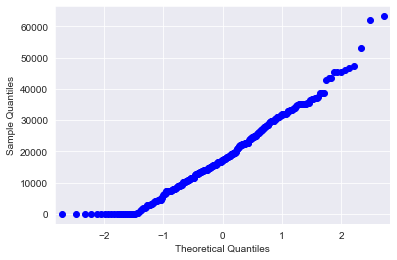

In [6]:
ford = top4_brand_df[top4_brand_df['brand']=='ford']['price']
dodge = top4_brand_df[top4_brand_df['brand']=='dodge']['price']
nissan = top4_brand_df[top4_brand_df['brand']=='nissan']['price']
chevrolet = top4_brand_df[top4_brand_df['brand']=='chevrolet']['price']

sm.qqplot(ford)
sm.qqplot(dodge)
sm.qqplot(nissan)
sm.qqplot(chevrolet)

### ANOVA (Analysis of Variance)

ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups).

ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal.

Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)

#### ANOVA Hypotheses
<ul>
    <li>Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp</li>
    <li>Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal</li>
</ul>

For this experimental design, there is only factor (price) or independent variable to evaluate, and therefore, one-way ANOVA method is suitable for analysis.

In [7]:
ford = top4_brand_df[top4_brand_df['brand']=='ford']['price']
dodge = top4_brand_df[top4_brand_df['brand']=='dodge']['price']
nissan = top4_brand_df[top4_brand_df['brand']=='nissan']['price']
chevrolet = top4_brand_df[top4_brand_df['brand']=='chevrolet']['price']

# Since chevrolet has the lowest size, we resize the other 3 brands in order to be equal
ford = ford[:chevrolet.shape[0]]
dodge = dodge[:chevrolet.shape[0]]
nissan = nissan[:chevrolet.shape[0]]

fvalue, pvalue = stats.f_oneway(ford, dodge, nissan, chevrolet)
print(fvalue, pvalue)

20.83339823456118 3.716205069103955e-13


### Interpretation
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among brands.

Note on F value: F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

### Correlation

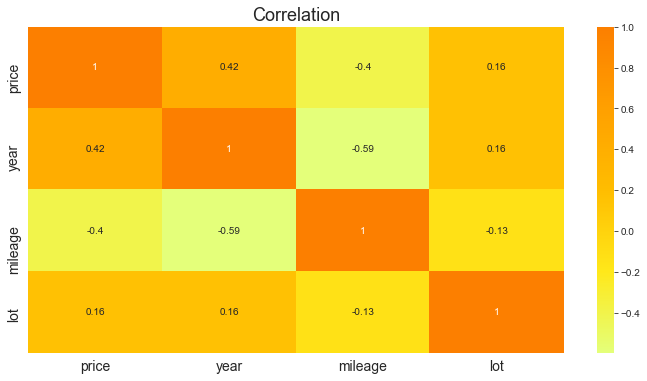

In [8]:
# Correlation plot
plt.figure(figsize=(12,6))
sns.heatmap(data_df.corr(), cmap = 'Wistia', annot= True);
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Correlation', fontsize = 18)
plt.show()

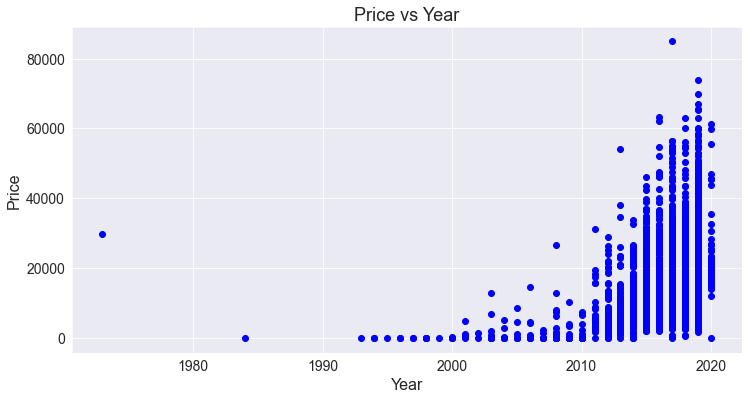

In [9]:
# Scatter plot Year vs Price
plt.figure(figsize=(12,6))
plt.scatter(data_df.year, data_df.price, c ='blue')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Price vs Year', fontsize = 18)
plt.show()

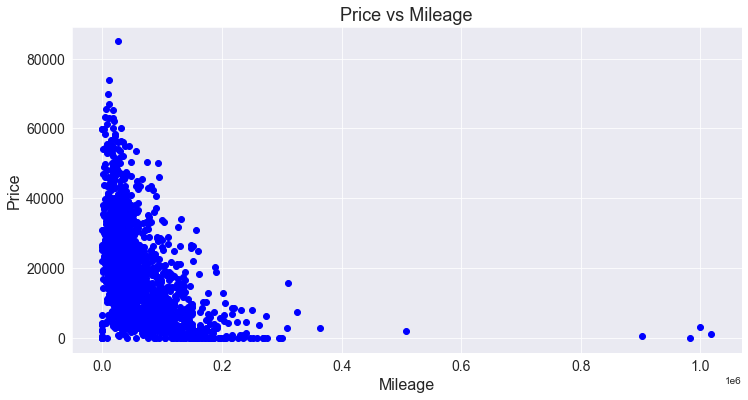

In [10]:
# Scatter plot Mileage vs Price
plt.figure(figsize=(12,6))
plt.scatter(data_df.mileage, data_df.price, c ="blue")
plt.xlabel('Mileage', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Price vs Mileage', fontsize = 18)
plt.show()

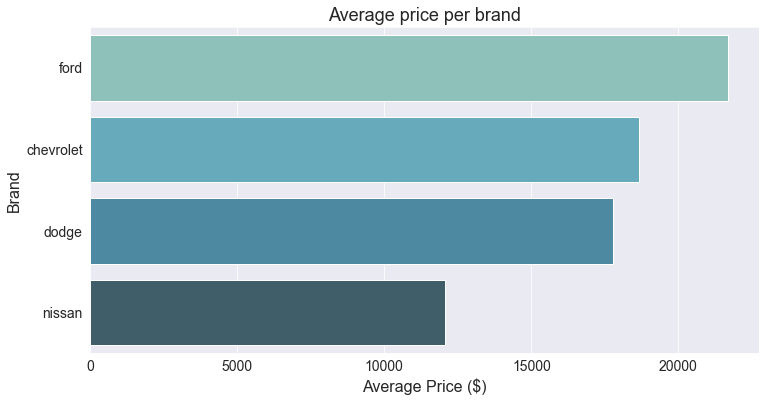

In [11]:
# Bar plot Average price per brand
av_prices = []
for brand in freq_df.index:
    x = data_df[data_df['brand']==brand]
    av_price = sum(x.price)/len(x)
    av_prices.append(av_price)
data = pd.DataFrame({'brand_list': freq_df.index,'av_prices':av_prices})
new_index = (data['av_prices'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(12,6))
sns.barplot(y=sorted_data['brand_list'], x=sorted_data['av_prices'], palette = 'GnBu_d')
plt.xlabel('Average Price ($)', fontsize = 16)
plt.ylabel('Brand', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Average price per brand', fontsize = 18)
plt.show()

### Ordinary Least Squares (OLS) using statsmodel


Description of some of the terms in the table : 
 
<ul>
    <li><strong>R-squared</strong> : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained</li>
    <li><strong>Adj. R-squared</strong> : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.</li>
    <li><strong>F-statistic</strong> : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.</li>
    <li><strong>coef</strong> : the coefficients of the independent variables and the constant term in the equation.</li>
    <li><strong>t</strong> : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error</li>
</ul>





In [12]:
for col in ['year', 'mileage']:
    x = data_df[col]
    y = data_df.price
    x = sm.add_constant(x)
    result = sm.OLS(y, x).fit()
    print('Feature: {}'.format(col.upper()))
    print(result.summary(), end='\n'*4)

Feature: YEAR
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     529.5
Date:                Sat, 21 May 2022   Prob (F-statistic):          2.02e-106
Time:                        20:52:55   Log-Likelihood:                -26801.
No. Observations:                2499   AIC:                         5.361e+04
Df Residuals:                    2497   BIC:                         5.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.95e+06   1.29e+05    -2